# Teste ANOVA - Python

**Definição**

A ANOVA teste paramétrico que possui estimativas de parâmetros utilizado diferenças entre as médias de uma determinada variável variável resposta.

Em relação a um tratamento com dois ou mais níveis categóricos variável preditora. 

O teste t também é utilizado nesse tipo de procedimento (com no máximo de dois níveis), porém a ANOVA é indicada para análises com um "n" amostral superior a 30.

In [35]:
# Instalando pacotes
!pip install researchpy

In [1]:
# Versão do python
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.9.7


In [2]:
#Importação das bibliotecas
import pandas as pd # Carregamento de arquivos de csv
import numpy as np # Carregamento cálculos em arrays multidimensionais

# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Verficações da versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

matplotlib: 3.4.3
seaborn   : 0.11.2
numpy     : 1.20.3
pandas    : 1.3.4
watermark : 2.3.1



In [4]:
# Configuração fundo dos gráficos e estilo, tamanho da fonte

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
color = sns.color_palette()

# Base dados

In [5]:
df = pd.read_csv("wfp_market_food_prices.csv", encoding = "ISO-8859-1", index_col=['adm0_name'])

In [6]:
# Exebindo o 5 primeiro dados 
df.head(5)

,adm0_id,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
adm0_name,,,,,,,,,,,,,,,,,
Afghanistan,1,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
Afghanistan,1,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
Afghanistan,1,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
Afghanistan,1,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
Afghanistan,1,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [7]:
# Exebindo o 5 últimos dados
df.tail(5)

,adm0_id,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
adm0_name,,,,,,,,,,,,,,,,,
South Sudan,70001,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
South Sudan,70001,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
South Sudan,70001,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
South Sudan,70001,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP
South Sudan,70001,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,3,2017,93.7,WFP


In [8]:
# Número de linhas e colunas 
df.shape

(743914, 17)

In [9]:
# Exibido os tipos de dados
df.dtypes

adm0_id                 int64
adm1_id                 int64
adm1_name              object
mkt_id                  int64
mkt_name               object
cm_id                   int64
cm_name                object
cur_id                  int64
cur_name               object
pt_id                   int64
pt_name                object
um_id                   int64
um_name                object
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource     object
dtype: object

In [10]:
# Informando as informações e das variaveis 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743914 entries, Afghanistan to South Sudan
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm1_id             743914 non-null  int64  
 2   adm1_name           729965 non-null  object 
 3   mkt_id              743914 non-null  int64  
 4   mkt_name            743914 non-null  object 
 5   cm_id               743914 non-null  int64  
 6   cm_name             743914 non-null  object 
 7   cur_id              743914 non-null  int64  
 8   cur_name            743914 non-null  object 
 9   pt_id               743914 non-null  int64  
 10  pt_name             743914 non-null  object 
 11  um_id               743914 non-null  int64  
 12  um_name             743914 non-null  object 
 13  mp_month            743914 non-null  int64  
 14  mp_year             743914 non-null  int64  
 15  mp_price            7439

In [11]:
# Total de colunas e linhas 

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 743914
Columns: 17


In [12]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   13949

Unique values :  
 adm0_id                   74
adm1_id                  605
adm1_name                588
mkt_id                  1471
mkt_name                1449
cm_id                    321
cm_name                  321
cur_id                    61
cur_name                  61
pt_id                      4
pt_name                    4
um_id                     62
um_name                   62
mp_month                  12
mp_year                   26
mp_price              113564
mp_commoditysource       248
dtype: int64


In [13]:
# Total de número duplicados
df.duplicated()

adm0_name
Afghanistan    False
Afghanistan    False
Afghanistan    False
Afghanistan    False
Afghanistan    False
               ...  
South Sudan    False
South Sudan    False
South Sudan    False
South Sudan    False
South Sudan    False
Length: 743914, dtype: bool

# Estatística descritiva

In [14]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
adm0_id,743914.0,929.754832,6595.353806,1.0,115.0,170.0,205.0,70001.0
adm1_id,743914.0,17779.426232,81345.242217,0.0,1510.0,2207.0,21969.0,900022.0
mkt_id,743914.0,885.962341,540.492854,80.0,377.0,912.0,1134.0,2094.0
cm_id,743914.0,161.130914,117.826297,50.0,67.0,110.0,233.0,490.0
cur_id,743914.0,57.325319,23.140366,22.0,30.0,63.0,77.0,95.0
pt_id,743914.0,14.930508,0.277872,14.0,15.0,15.0,15.0,18.0
um_id,743914.0,10.562171,13.160485,5.0,5.0,5.0,5.0,100.0
mp_month,743914.0,6.379772,3.434972,1.0,3.0,6.0,9.0,12.0
mp_year,743914.0,2012.516549,3.669519,1992.0,2011.0,2013.0,2015.0,2017.0
mp_price,743914.0,4196.332703,55492.958067,0.0,30.0,175.0,500.0,5833333.0


In [15]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
adm0_id,1.000000,-0.005892,0.065638,-0.030842,0.098446,0.030822,0.186552,0.001854,-0.020291,-0.009116
adm1_id,-0.005892,1.000000,0.155600,0.060518,0.043272,0.012618,0.087768,-0.014006,0.073136,-0.003447
mkt_id,0.065638,0.155600,1.000000,0.258598,0.571483,0.070133,0.089540,-0.005090,0.336997,-0.013084
cm_id,-0.030842,0.060518,0.258598,1.000000,0.327137,0.087747,0.200331,0.000142,0.215234,0.010611
cur_id,0.098446,0.043272,0.571483,0.327137,1.000000,0.077030,0.087923,0.016091,0.247220,0.002638
pt_id,0.030822,0.012618,0.070133,0.087747,0.077030,1.000000,-0.048228,0.001840,0.027193,-0.129481
um_id,0.186552,0.087768,0.089540,0.200331,0.087923,-0.048228,1.000000,-0.004929,0.084414,0.037014
mp_month,0.001854,-0.014006,-0.005090,0.000142,0.016091,0.001840,-0.004929,1.000000,-0.075658,0.001009
mp_year,-0.020291,0.073136,0.336997,0.215234,0.247220,0.027193,0.084414,-0.075658,1.000000,-0.003048
mp_price,-0.009116,-0.003447,-0.013084,0.010611,0.002638,-0.129481,0.037014,0.001009,-0.003048,1.000000


Text(0.5, 1.0, 'Matriz de correlação')

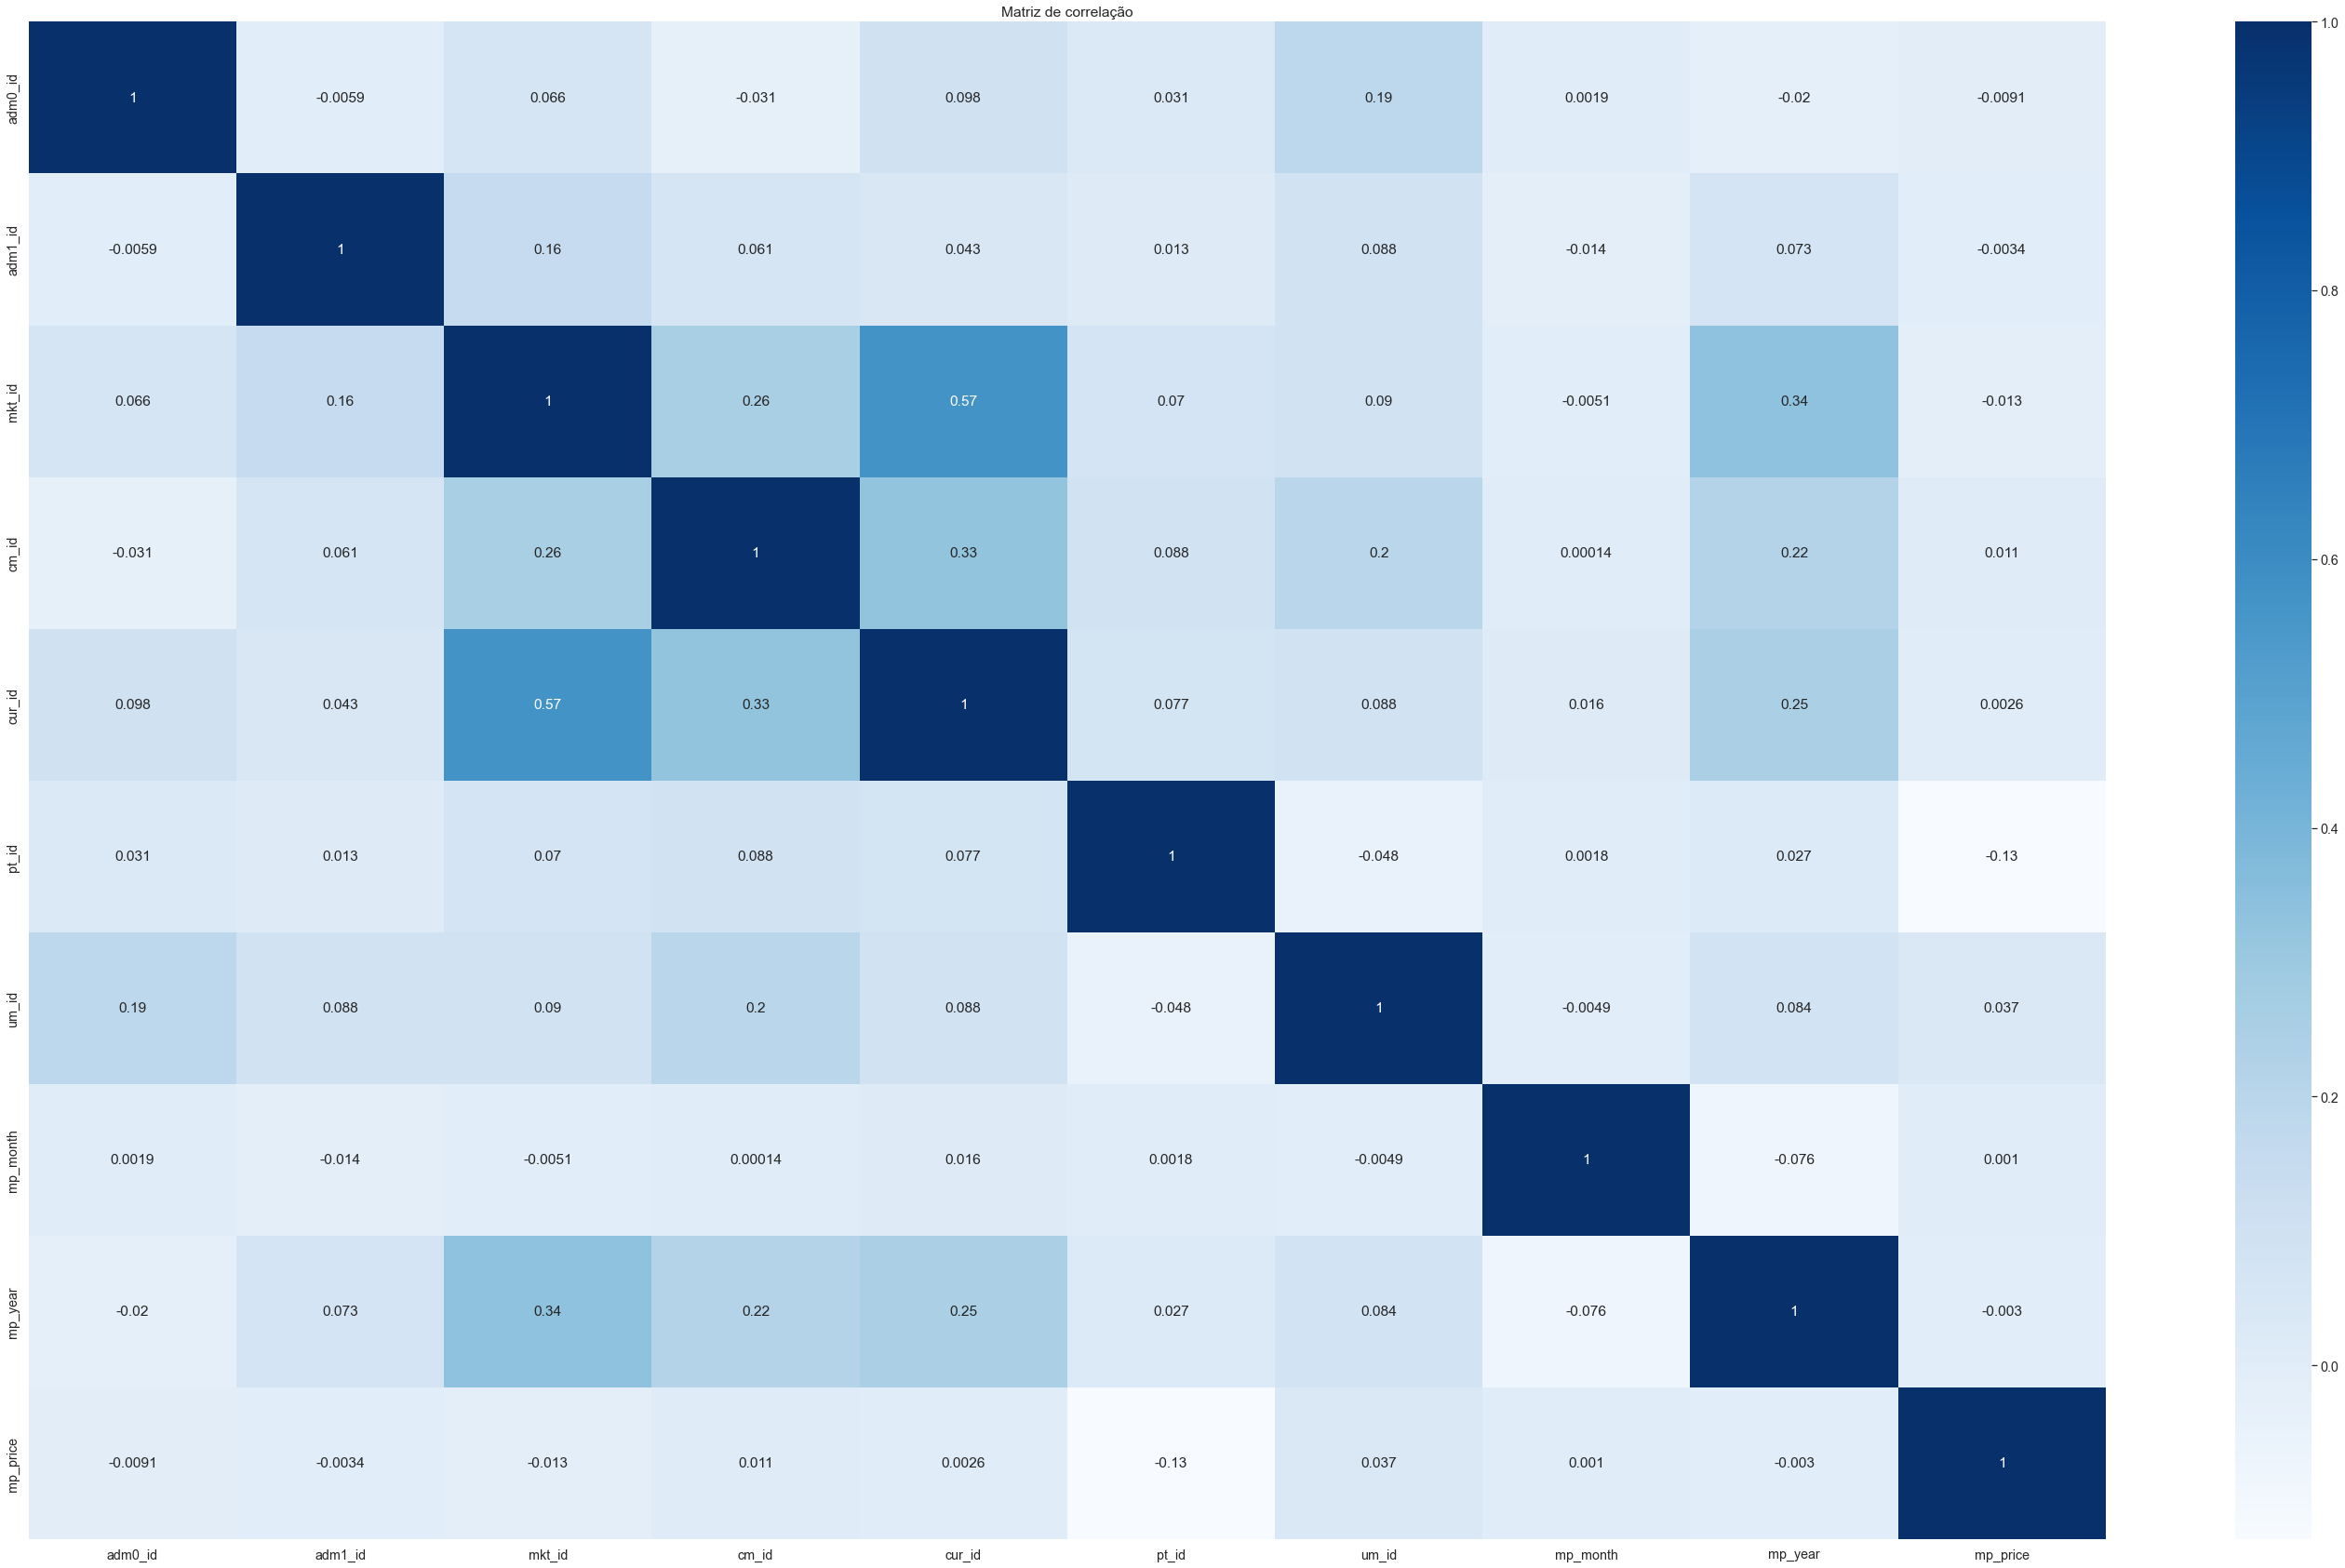

In [16]:
# Gráfico da matriz de correlação

plt.figure(figsize=(50,30))
ax = sns.heatmap(corr, annot=True, cmap='Blues');
plt.title("Matriz de correlação")

In [17]:
# Excluindo tabela adm0_id
df.drop("adm0_id", axis= 1, inplace= True)

In [22]:
# Teste ANOVA

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Como é a sintaxe: stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

stats.f_oneway(df['mp_price'][df['cm_name'] == 'Bread'],
               df['mp_price'][df['cm_name'] == 'Sesame'],
               df['mp_price'][df['cm_name'] == 'Fuel (petrol-gasoline)'])

# Obtem mais informacoes
results = ols('mp_price ~ C(cm_name)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mp_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2298.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:19:03   Log-Likelihood:            -8.9264e+06
No. Observations:              743914   AIC:                         1.785e+07
Df Residuals:                  743593   BIC:                         1.786e+07
Df Model:                         320                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      106.0017   1825.209      0.058      0.954   -3471.348    3683.352
C(cm_name)[T.Apples (red)]                                    1319.1028   2126.519      0.620      0.535   -2848.805    5487.011
C(cm_name)[T.Avocados]                                         103.3731   2007.831      0.051      0.959   -3831.910    4038.656
C(cm_name)[T.Bananas]                                          104.6510   1919.421      0.055      0.957   -3657.351    3866.653
C(cm_name)[T.Bananas (medium size)]                           -100.4047   4173.017     -0.024      0.981   -8279.382    8078.572
C(cm_name)[T.Beans]                                           3.582e+04   1881.271     19.043      0.000    3.21e+04    3.95e+04
C(cm_name)[T.Beans (black)]                                    258.4429   2235.415      0.116      0.908   -4122.898    4639.784
C(cm_name)[T.Beans (butter)]                                   -34.9039   2785.206     -0.013      0.990   -5493.817    5424.009
C(cm_name)[T.Beans (catarino)]                                 -33.6789   2832.952     -0.012      0.991   -5586.172    5518.814
C(cm_name)[T.Beans (dry)]                                      312.2102   1861.606      0.168      0.867   -3336.477    3960.898
C(cm_name)[T.Beans (fava, dry)]                                -92.8682   3078.732     -0.030      0.976   -6127.082    5941.346
C(cm_name)[T.Beans (green, fresh)]                             361.4646   2138.376      0.169      0.866   -3829.682    4552.611
C(cm_name)[T.Beans (haricot)]                                  -97.3939   5211.874     -0.019      0.985   -1.03e+04    1.01e+04
C(cm_name)[T.Beans (kidney red)]                               328.2778   2494.292      0.132      0.895   -4560.452    5217.008
C(cm_name)[T.Beans (kidney white)]                             -54.2093   3650.418     -0.015      0.988   -7208.909    7100.490
C(cm_name)[T.Beans (kidney)]                                  -102.9366   3316.652     -0.031      0.975   -6603.465    6397.592
C(cm_name)[T.Beans (magnum)]                                   -34.0369   3668.269     -0.009      0.993   -7223.723    7155.649
C(cm_name)[T.Beans (mung)]                                     -30.5495   3641.632     -0.008      0.993   -7168.030    7106.931
C(cm_name)[T.Beans (niebe)]                                   2190.5301   1871.639      1.170      0.242   -1477.821    5858.881
C(cm_name)[T.Beans (niebe, white)]                            8792.3034   3476.110      2.529      0.011    1979.242    1.56e+04
C(cm_name)[T.Beans (red)]                                      627.7613   1976.463      0.318      0.751   -3246.041

In [23]:
# Obtendo a tabela ANOVA
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cm_name),1.138960e+15,320.0,2297.631271,0.0
Residual,1.151897e+15,743593.0,NaN,NaN


In [24]:
# Cria uma tabela para mostrar vários resultados
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(cm_name),1.138960e+15,320.0,3.559250e+12,2297.631271,0.0,0.497176,0.49696
Residual,1.151897e+15,743593.0,1.549095e+09,NaN,NaN,NaN,NaN


Sobre as métricas:

- Sum_sq: explained variance

- df: degree of freedom.

- mean_sq: Another thing we need to calculate is the mean squares. The mean squares is desired because it eliminates the bias present in the SSM and SSR, and it is also used to calculate the F-statistic and omega squared. SSM and SSR are biased because they are influenced by the number of values summed to calculated them. To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.

- Eta_sql é o eta-quadrado, que é análogo ao r-quadrado. R2 is a measure of how much variance is explained by the model and is calculated by taking the explained variance (SSM) and dividing it by the total variance (SST; also called total sum of squares). With the total variance (SST) equaling the sum of squares for the model (SSM) plus the sum of square for the residual (SSR). Nosso modelo explica 46% da variação em libido.

# Assumption Checks/Model Diagnostics

In [25]:
results.diagn

{'jb': 52553035893.9475,
 'jbpv': 0.0,
 'skew': 16.740551357292077,
 'kurtosis': 1304.6659395494905,
 'omni': 1541461.6892575778,
 'omnipv': 0.0,
 'condno': 872.3879892403367,
 'mineigval': 0.993177384655595}

In [28]:
stats.levene(df['mp_price'][df['cm_name'] == 'Bread'],
               df['mp_price'][df['cm_name'] == 'Sesame'],
               df['mp_price'][df['cm_name'] == 'Fuel (petrol-gasoline)'])

# Normality
stats.shapiro(results.resid)

ShapiroResult(statistic=0.07782548666000366, pvalue=0.0)

In [30]:
# TUKEY’S HSD POST-HOC COMPARISON
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['mp_price'], df['cm_name'])
mc_results = mc.tukeyhsd()
print(mc_results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
# BONFERRONI CORRECTION POST-HOC COMPARISON
stats.ttest_ind(df['mp_price'][df['cm_name'] == 'Bread'], df['mp_price'][df['cm_name'] == 'Sesame'])

Ttest_indResult(statistic=-56.6202150163793, pvalue=0.0)

In [33]:
stats.ttest_ind(df['mp_price'][df['cm_name'] == 'Bread'], df['mp_price'][df['cm_name'] == 'Sesame'])

Ttest_indResult(statistic=-56.6202150163793, pvalue=0.0)

In [34]:
stats.ttest_ind(df['mp_price'][df['cm_name'] == 'Bread'], df['mp_price'][df['cm_name'] == 'Sesame'])


Ttest_indResult(statistic=-56.6202150163793, pvalue=0.0)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. We can calculate the high dosing’s effect size! To calculate the effect size for the treatment dosing we also need to calculate the degrees of freedom since it’s not provided. The following equations can be used:

- dof = #_observations_group1 + #_observations_group2 - #_of_groups
- dof = 5 + 5 - 2 = 8
- effect size r = square root of (t2/t2 + dof)
- effect size r = sqrt(1.2132/(1.2132 + 8)) = 0.39

# ANOVA 

**Interpretação dos resultados**

Na interpretação dos resultados da ANOVA, serão utilizados os resultados da análise post-hoc de Bonferroni.
Houve efeito significativo de Difficile no nível de libido, F(2,12)= 5,12, p < 0,05, ?2 = 0,35. O teste post-hoc planejado, usando a correção de Bonferroni ?= 0,0167, revelou que a alta dose de Difficile aumentou significativamente a libido em comparação com o placebo, t(8)=3,06, p < 0,0167, r= 0,39. Não houve outras diferenças estatisticamente significativas entre os grupos.

# Referencia 

Link 1: https://github.com/yukioandre/Python/blob/master/ANOVA.ipynb

Link 2: https://estatsite.com.br/2020/03/15/anova-em-python/